<a href="https://colab.research.google.com/github/KenDaupsey/Exploratory-Data-Analysis-EDA-/blob/main/Exploratory_Data_Analysis_(EDA)_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Exploratory Data Analysis Example 2:

## Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from GitHub URL
url = "https://raw.githubusercontent.com/KenDaupsey/Exploratory-Data-Analysis-EDA-/main/hsb2%7Edata.csv"
df = pd.read_csv(url)

In [5]:
# 1. Overview and Data Quality

# Print dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       200 non-null    int64 
 1   female   200 non-null    object
 2   race     200 non-null    object
 3   ses      200 non-null    object
 4   schtyp   200 non-null    object
 5   prog     200 non-null    object
 6   read     200 non-null    int64 
 7   write    200 non-null    int64 
 8   math     200 non-null    int64 
 9   science  200 non-null    int64 
 10  socst    200 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 17.3+ KB
None


In [6]:
# Check for missing values
print(df.isnull().sum())

id         0
female     0
race       0
ses        0
schtyp     0
prog       0
read       0
write      0
math       0
science    0
socst      0
dtype: int64


In [7]:
# Descriptive statistics
print(df.describe())

               id        read       write        math     science       socst
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000   52.230000   52.775000   52.645000   51.850000   52.405000
std     57.879185   10.252937    9.478586    9.368448    9.900891   10.735793
min      1.000000   28.000000   31.000000   33.000000   26.000000   26.000000
25%     50.750000   44.000000   45.750000   45.000000   44.000000   46.000000
50%    100.500000   50.000000   54.000000   52.000000   53.000000   52.000000
75%    150.250000   60.000000   60.000000   59.000000   58.000000   61.000000
max    200.000000   76.000000   67.000000   75.000000   74.000000   71.000000


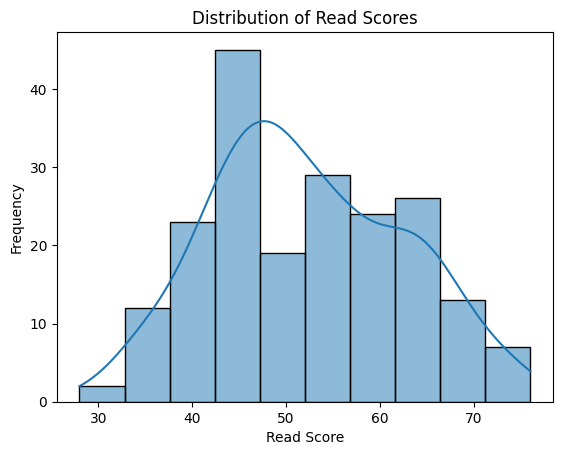

In [8]:
# 2. Exploring Numeric Variables

# Distribution of read scores
sns.histplot(df["read"], bins=10, kde=True)  # Use histplot instead of deprecated distplot
plt.title("Distribution of Read Scores")
plt.xlabel("Read Score")
plt.ylabel("Frequency")
plt.show()

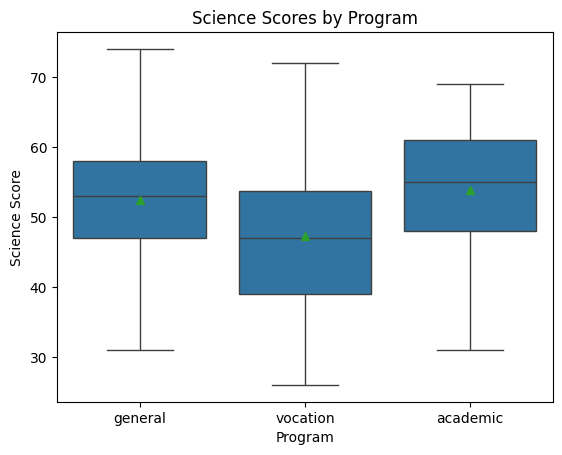

In [9]:
# Boxplot of science scores by program
sns.boxplot(
    x="prog",
    y="science",
    showmeans=True,
    data=df,
)
plt.title("Science Scores by Program")
plt.xlabel("Program")
plt.ylabel("Science Score")
plt.show()

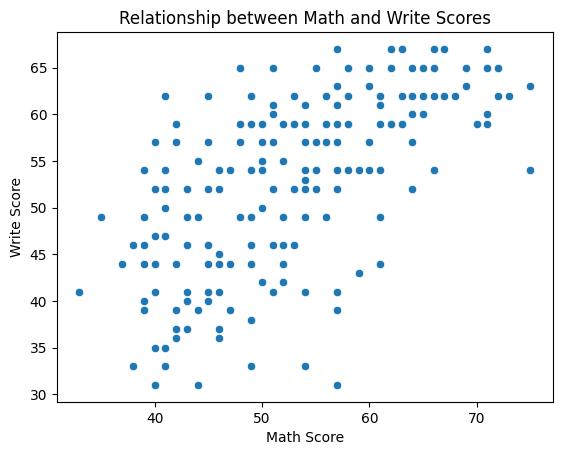

In [10]:
# Scatter plot of math vs. write scores
sns.scatterplot(x="math", y="write", data=df)
plt.title("Relationship between Math and Write Scores")
plt.xlabel("Math Score")
plt.ylabel("Write Score")
plt.show()

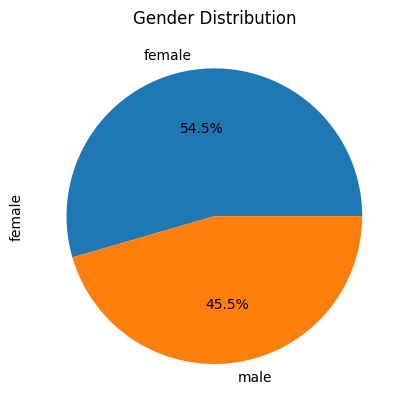

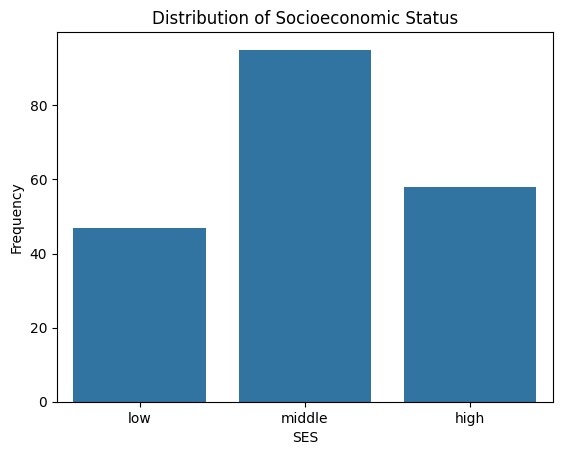

In [11]:
# 3. Exploring Categorical Variables

# Frequencies of gender and SES
df["female"].value_counts().plot(kind="pie", autopct="%1.1f%%", title="Gender Distribution")
plt.show()

sns.countplot(x="ses", data=df)
plt.title("Distribution of Socioeconomic Status")
plt.xlabel("SES")
plt.ylabel("Frequency")
plt.show()

In [12]:
# Cross-tabulation of school type and program
print(pd.crosstab(df["schtyp"], df["prog"], margins=True))

prog     academic  general  vocation  All
schtyp                                   
private        24        6         2   32
public         81       39        48  168
All           105       45        50  200


In [13]:
# Chi-square test for independence between gender and program
from scipy.stats import chi2_contingency

table = pd.crosstab(df["female"], df["prog"])
chi2, pval, _, _ = chi2_contingency(table)
print(f"Chi-square test for independence between gender and program: p-value = {pval:.4f}")

Chi-square test for independence between gender and program: p-value = 0.9739


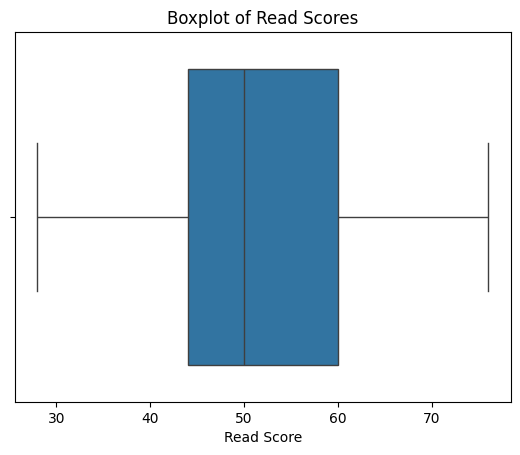

In [14]:
# 4. Identifying Potential Outliers Using Boxplots

# Boxplot of read scores
sns.boxplot(x=df["read"])
plt.title("Boxplot of Read Scores")
plt.xlabel("Read Score")
plt.show()

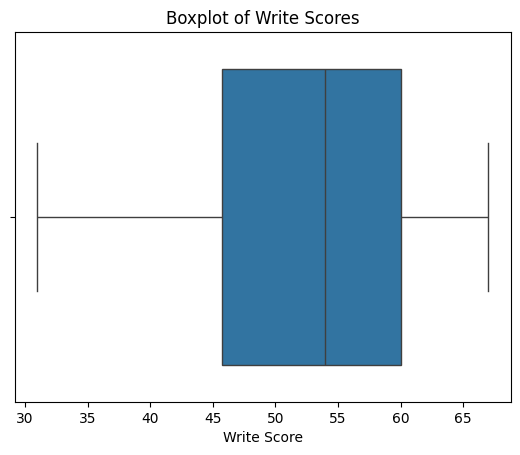

In [15]:
# Boxplot of write scores
sns.boxplot(x=df["write"])
plt.title("Boxplot of Write Scores")
plt.xlabel("Write Score")
plt.show()

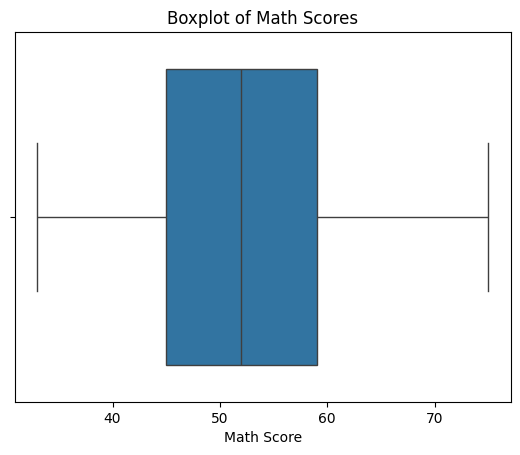

In [16]:
# Boxplot of math scores
sns.boxplot(x=df["math"])
plt.title("Boxplot of Math Scores")
plt.xlabel("Math Score")
plt.show()

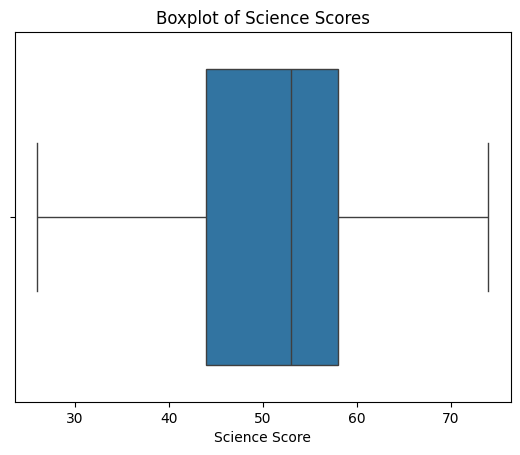

In [17]:
# Boxplot of science scores
sns.boxplot(x=df["science"])
plt.title("Boxplot of Science Scores")
plt.xlabel("Science Score")
plt.show()

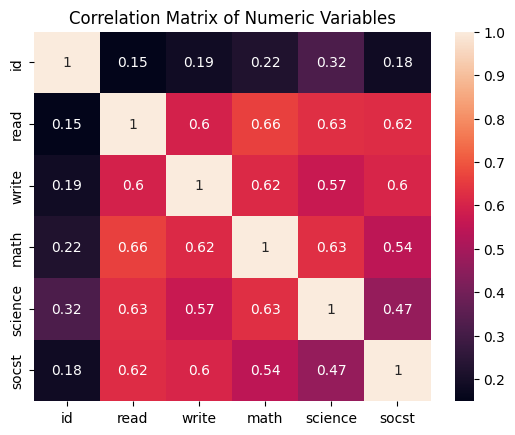

In [19]:
# 5. Additional Insights

# Correlation matrix visualization
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix of Numeric Variables")
plt.show()

# Further analysis may involve investigating relationships between variables, handling missing values, and addressing potential biases.